# Curvas Elípticas

As curvas elípticas não são elipses. Eles são assim chamados porque são descritas por Equações cúbicas, semelhantes às utilizadas para calcular a circunferência de uma elipse. Em geral as equações cúbicas para curvas elípticas em $\mathbb{R}$ são descritas pela Equação de Weierstrass, sendo os pontos $(x, y)$ que satisfazem:

$$ y^2 + axy + by = x^3 + cx^2 + dx + e $$
Incluindo um ponto $\mathcal{O}$ (chamado ponto no infinto) e onde $a, b, c, d, e \in \mathbb{R}$. O ponto to infinito $\mathcal{O}$ possui as seguintes propriedade, seja $P \in E$, $E$ uma curva. Temos:

\begin{align*}
 P + \mathcal{O} &= P\\
 P - P &= \mathcal{O}
\end{align*}

Para facilitar a visualização e diminuir o escopo deste trabalho, nos limitaremos apenas às curvas da forma:
$$ y^2 = x^3 + ax + b$$

## SAGE: Construtor de Curvas Elípticas

Fonte: Documentação do SAGE [[1]](https://doc.sagemath.org/html/en/reference/curves/sage/schemes/elliptic_curves/constructor.html).


> In Sage, an elliptic curve is always specified by (the coefficients of) a long Weierstrass equation
> 
> $$y^2 + a_1 xy + a_3 y = x^3 + a_2 x^2 + a_4 x + a_6$$

### Exemplo: Curva $y^2 = x^3 - 3x^2 + 5$

\begin{align*}
y^2 + 0\cdot xy + 0\cdot y &= x^3 + 0\cdot x^2 + (-3)\cdot x + 5\\
y^2 &= x^3 - 3x^2 + 5
\end{align*}



In [1]:
E = EllipticCurve([0,0,0,-3,5])
E

Elliptic Curve defined by y^2 = x^3 - 3*x + 5 over Rational Field

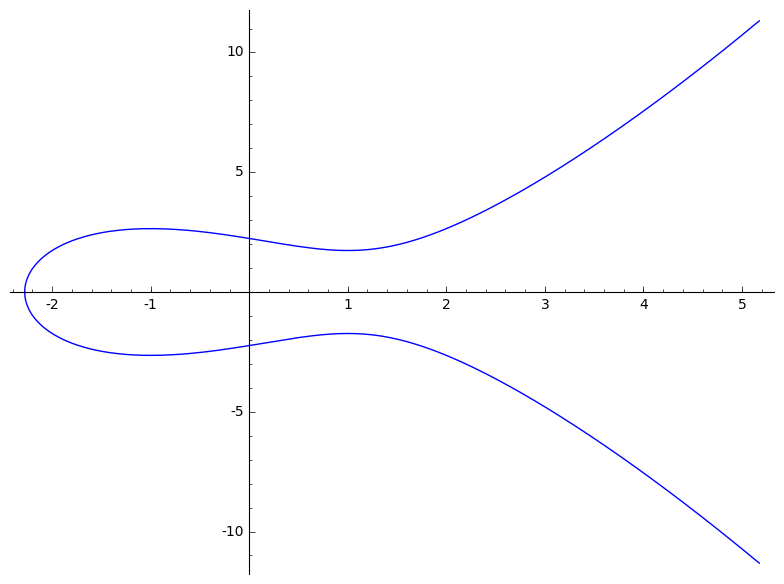

In [2]:
plot(E)

### Operações no Grupo

Denotaremos a operação no grupo pelo símbolo de adição "$+$". Por adição nos referimos à seguinte operação: Dados dois pontos $P, Q \in E$, $P = (x_1,y_1), Q = (x_2, y_2)$, devemos computar as coordenadas de um terceiro ponto R tal
que:

\begin{align*}
    P + Q &= R\\
    (x_1, y_1) + (x_2, y_2) &= (x_3, y_3)
\end{align*}
onde as coordenadas do ponto $R$ serão:
\begin{align*}
    x_3 &= s^2 - x_1 - x_2 \pmod{p}\\
    y_3 &= s(x_1 - x_3 ) - y_1 \pmod{p}
\end{align*}
onde:
    $$ s = \left\{\begin{matrix}
\frac{y_2 - y_1}{x_2 - x_1} & \text{se } P_1 \ne P_2 \\
 & \\
\frac{3x_1^2 + a}{2y_1} &  \text{se } P_1 = P_2
\end{matrix}\right.$$


In [3]:
import os
from IPython.display import Image

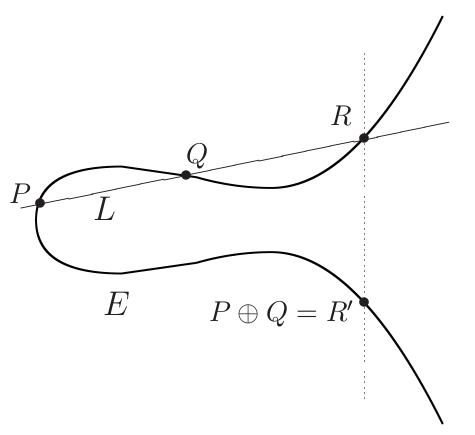

In [4]:
IMG1 = os.path.join('..','DATA','curva1.png')
Image(filename=IMG1)

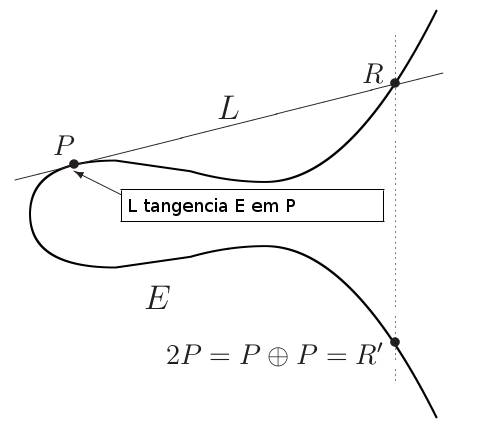

In [5]:
IMG2 = os.path.join('..','DATA','curva2.png')
Image(filename=IMG2)

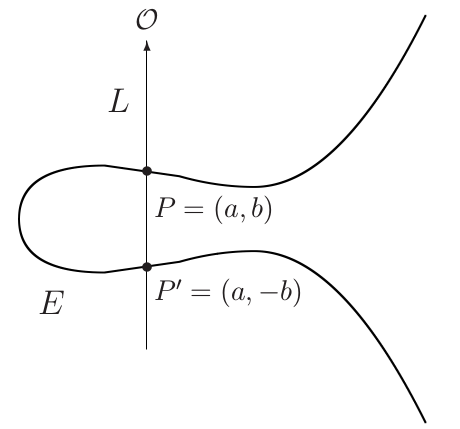

In [6]:
IMG3 = os.path.join('..','DATA','curva3.png')
Image(filename=IMG3)

## Diffie Hellman num Grupo Aditivo $E$

* Escolha $P \in E$
* Alice e Bob geram $a,b$ aleatoriamente, Alice envia $aP$ e Bob envia $bP$.
    
    $$ aP = \underbrace{P + P + \ldots + P}_{\text{a vezes}} $$
    $$ bP = \underbrace{P + P + \ldots + P}_{\text{b vezes}} $$

* O segredo compartilhado é $abP$.

## Curva Elítptica sobre $\mathbb{Z}_p$

Uma curva elíptica sobre um corpo finito $\mathbb{Z}_p, p>3$, é o conjunto de todos os pares $(x,y) \in \mathbb{Z}^2_p$  tal que:

$$ y^2 \equiv x^3 + ax + b \pmod{p} $$

incluindo o ponto $\mathcal{O}$, chamado de ponto no infinito e $a,b \in \mathbb{Z}_p$ obedecem a relação:

$$4a^3 + 27b^2 \not \equiv 0 $$

## SAGE: Construtor de Curvas Elípticas

In [7]:
p = next_prime(2^258)

In [8]:
p

463168356949264781694283940034751631413079938662562256157830336031652518559817

In [9]:
F = FiniteField(p)

In [10]:
F

Finite Field of size 463168356949264781694283940034751631413079938662562256157830336031652518559817

In [11]:
C = EllipticCurve(F, [2, 3])

In [12]:
C

Elliptic Curve defined by y^2 = x^3 + 2*x + 3 over Finite Field of size 463168356949264781694283940034751631413079938662562256157830336031652518559817

In [13]:
C.cardinality()

463168356949264781694283940034751631414103709717567128976662687657513908919174

## Plotando curvas sobre $\mathbb{Z}_p$.

In [14]:
F = FiniteField(263)
C = EllipticCurve(F, [ 2, 3 ])
C

Elliptic Curve defined by y^2 = x^3 + 2*x + 3 over Finite Field of size 263

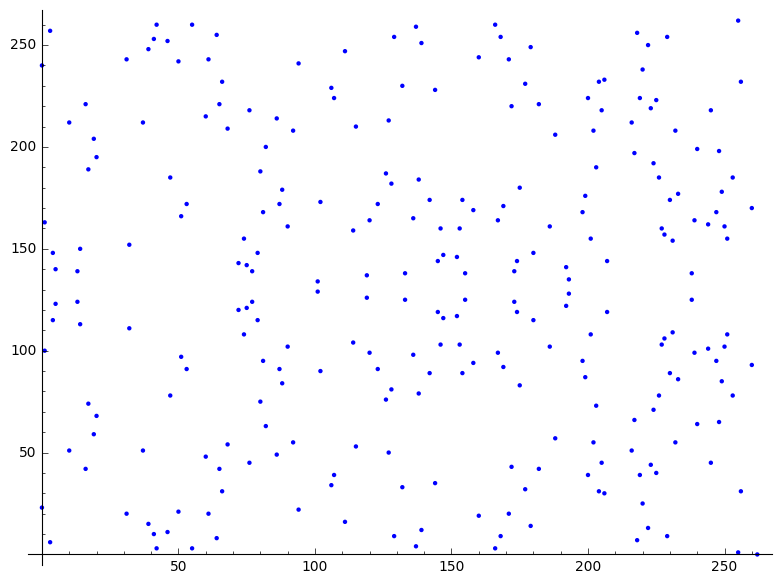

In [15]:
plot(C)

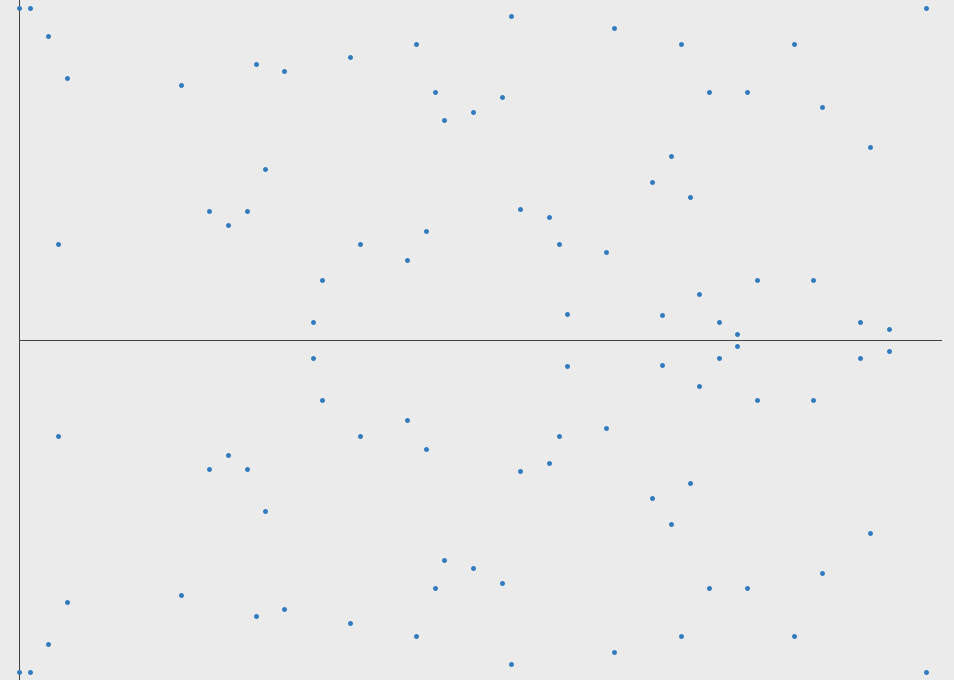

In [16]:
GIF = os.path.join('..', 'DATA', 'image01.gif.png')
Image(GIF)

In [17]:
G = C.point([200, 39])

In [18]:
A = plot([])

pts = [ G * x for x in range(1, G.order()) ]

for i in range(len(pts) - 1):
    A += plot(line([pts[i], pts[i+1]]))
    
A

Graphics3d Object

## Log. Discreto com Curvas Elípticas

Dada uma Curva Elíptica $E$, gerador $P$ e um $T \in E$ qualquer. O problema do logaritmo discreto em curvas elípticas é encontrar $k \in \mathbb{Z}$ tal que:

$$ \underbrace{P + P + \ldots + P}_{\text{k vezes}} = kP = T$$

Note que:
* $k \in \mathbb{Z}_p^\ast$ será uma chave privada
* $T \in E$ será uma chave pública. 

## Diffie-Hellman com Curvas Elípticas

### Parâmetros Públicos:
* $E := y^2 \equiv x^3 + ax + b \pmod{p} $
* $P \in E, P = (x_p, y_p)$

### Protocolo:

* Alice:
    * Computa $a \in \{2, 3, \ldots, \lvert E \rvert \}$ aleatoriamente
    * $KA_{prk} = a$
    * $KA_{pbk} = aP$
    
* Bob:
    * Computa $b \in \{2, 3, \ldots, \lvert E \rvert \}$ aleatoriamente
    * $KB_{prk} = b$
    * $KB_{pbk} = bP$
    
* Troca
    * Alice envia $KA_{pbk}$ para Bob.
    * Bob envia $KB_{pbk}$ para Alice.
    
* Geração da chave compartilhada:
    * Alice computa $K = a KB_{pbk} = abP$
    * Bob computa $K = b KA_{pbk} = baP$
    
Alice e Bob chegaram a uma mesma chave $K = (ab)P = (ba)P$.

In [19]:
F = FiniteField(17)
E = EllipticCurve(F, [0,0,0,2,2])
E

Elliptic Curve defined by y^2 = x^3 + 2*x + 2 over Finite Field of size 17

In [20]:
P = E.point((10,6))

In [21]:
kpvA = ZZ.random_element(17)
kpbA = P*kpvA

print("Parametros de Alice: ", kpvA, kpbA)

('Parametros de Alice: ', 14, (3 : 1 : 1))


In [22]:
kpvB = ZZ.random_element(17)
kpbB = P*kpvB

print("Parametros de Bob: ", kpvB, kpbB)

('Parametros de Bob: ', 4, (0 : 11 : 1))


In [23]:
A = kpvA*kpbB
B = kpvB*kpbA

In [24]:
A,B

((10 : 11 : 1), (10 : 11 : 1))

# Curva M-221 [[2013 Aranha–Barreto–Pereira–Ricardini]](https://eprint.iacr.org/2013/647.pdf)

$$ y^2 = x^3+117050x^2+x \pmod{ 2^{221} - 3 }$$

In [25]:
p = 2^(221) - 3

In [26]:
F = FiniteField(p)

In [27]:
E = EllipticCurve(F, [0, 117050, 0, 1, 0])

In [28]:
E

Elliptic Curve defined by y^2 = x^3 + 117050*x^2 + x over Finite Field of size 3369993333393829974333376885877453834204643052817571560137951281149

## Curva M-383 [[2013 Aranha–Barreto–Pereira–Ricardini]](https://eprint.iacr.org/2013/647.pdf)

$$ y^2 = x^3+2065150x^2+x  \pmod{2^{383} - 187} $$

## Curva M-511 [[2013 Aranha–Barreto–Pereira–Ricardini]](https://eprint.iacr.org/2013/647.pdf)

$$ y^2 = x^3+530438x^2+x \pmod{ 2^{511} - 187 } $$